In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.utils import shuffle

In [3]:
from keras.models import Model
from keras.layers import Input, Embedding, Dot, Add, Flatten
from keras.regularizers import l2
from keras.optimizers import SGD, Adam

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [4]:
df_train = pd.read_csv('ml-100k/ua.base',"\t", header=None, names=["userId","movieId","rating","timestamp"])
df_test = pd.read_csv('ml-100k/ua.test',"\t", header=None, names=["userId","movieId","rating","timestamp"])

In [5]:
print(df_train.head())

   userId  movieId  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        3       4  878542960
3       1        4       3  876893119
4       1        5       3  889751712


In [6]:
df_train.userId = df_train.userId - 1
df_train.movieId = df_train.movieId - 1
df_train = df_train.drop("timestamp", axis=1)

df_test.userId = df_test.userId - 1
df_test.movieId = df_test.movieId - 1
df_test = df_test.drop("timestamp", axis=1)

df_train = shuffle(df_train)
df_test = shuffle(df_test)

In [7]:
# Intialize variables
K = 10
mu = df_train.rating.mean()
epochs = 500
reg = 0.
N = 943
M = 1682
print N
print M

943
1682


In [8]:
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K, embeddings_regularizer=l2(reg))(u) # (N, 1, K)
m_embedding = Embedding(M, K, embeddings_regularizer=l2(reg))(m) # (N, 1, K)

In [9]:
u_bias = Embedding(N, 1, embeddings_regularizer=l2(reg))(u) # (N, 1, 1)
m_bias = Embedding(M, 1, embeddings_regularizer=l2(reg))(m) # (N, 1, 1)
x = Dot(axes=2)([u_embedding, m_embedding]) # (N, 1, 1)

In [10]:
x = Add()([x, u_bias, m_bias])
x = Flatten()(x)

In [11]:
model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
    #optimizer='adam',
  # optimizer=Adam(lr=0.01),
  optimizer=SGD(lr=0.08, momentum=0.9),
  metrics=['mse'],
)

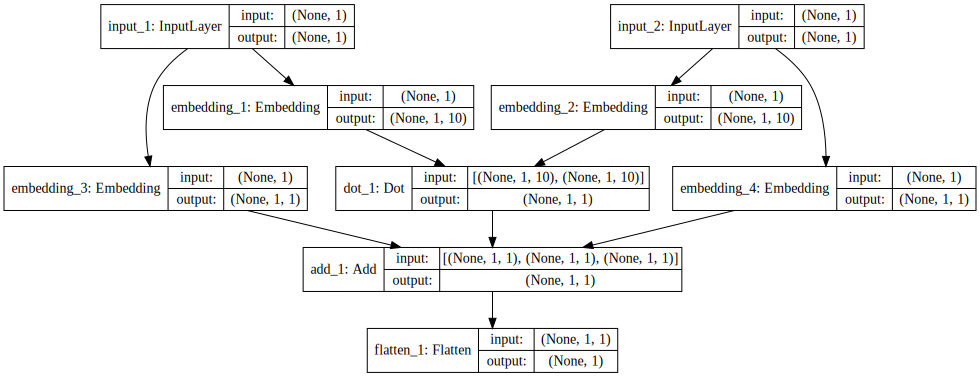

In [12]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [13]:
r = model.fit(
  x=[df_train.userId.values, df_train.movieId],
  y=df_train.rating.values - mu,
  epochs=epochs,
  batch_size=128,
  validation_data=(
    [df_test.userId.values, df_test.movieId],
    df_test.rating.values - mu
  )
)

Train on 90570 samples, validate on 9430 samples
Epoch 1/500
90570/90570 [==============================] - 1s 12us/step - loss: 1.0110 - mean_squared_error: 1.0110 - val_loss: 0.9890 - val_mean_squared_error: 0.9890
Epoch 2/500
90570/90570 [==============================] - 1s 12us/step - loss: 0.9020 - mean_squared_error: 0.9020 - val_loss: 0.9523 - val_mean_squared_error: 0.9523
Epoch 3/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.8781 - mean_squared_error: 0.8781 - val_loss: 0.9391 - val_mean_squared_error: 0.9391
Epoch 4/500
90570/90570 [==============================] - 1s 12us/step - loss: 0.8667 - mean_squared_error: 0.8667 - val_loss: 0.9303 - val_mean_squared_error: 0.9303
Epoch 5/500
90570/90570 [==============================] - 1s 13us/step - loss: 0.8586 - mean_squared_error: 0.8586 - val_loss: 0.9264 - val_mean_squared_error: 0.9264
Epoch 6/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.8522 - mean_squared_error: 0.

90570/90570 [==============================] - 1s 12us/step - loss: 0.5016 - mean_squared_error: 0.5016 - val_loss: 1.0244 - val_mean_squared_error: 1.0244
Epoch 50/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.5004 - mean_squared_error: 0.5004 - val_loss: 1.0295 - val_mean_squared_error: 1.0295
Epoch 51/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4996 - mean_squared_error: 0.4996 - val_loss: 1.0319 - val_mean_squared_error: 1.0319
Epoch 52/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4982 - mean_squared_error: 0.4982 - val_loss: 1.0357 - val_mean_squared_error: 1.0357
Epoch 53/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4975 - mean_squared_error: 0.4975 - val_loss: 1.0401 - val_mean_squared_error: 1.0401
Epoch 54/500
90570/90570 [==============================] - 1s 12us/step - loss: 0.4965 - mean_squared_error: 0.4965 - val_loss: 1.0441 - val_mean_squared_error: 1.0441

90570/90570 [==============================] - 1s 11us/step - loss: 0.4752 - mean_squared_error: 0.4752 - val_loss: 1.1868 - val_mean_squared_error: 1.1868
Epoch 98/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4752 - mean_squared_error: 0.4752 - val_loss: 1.1867 - val_mean_squared_error: 1.1867
Epoch 99/500
90570/90570 [==============================] - 1s 12us/step - loss: 0.4748 - mean_squared_error: 0.4748 - val_loss: 1.1922 - val_mean_squared_error: 1.1922
Epoch 100/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4747 - mean_squared_error: 0.4747 - val_loss: 1.1909 - val_mean_squared_error: 1.1909
Epoch 101/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4744 - mean_squared_error: 0.4744 - val_loss: 1.1946 - val_mean_squared_error: 1.1946
Epoch 102/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4743 - mean_squared_error: 0.4743 - val_loss: 1.1989 - val_mean_squared_error: 1.1

90570/90570 [==============================] - 1s 11us/step - loss: 0.4668 - mean_squared_error: 0.4668 - val_loss: 1.3060 - val_mean_squared_error: 1.3060
Epoch 146/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4667 - mean_squared_error: 0.4667 - val_loss: 1.3080 - val_mean_squared_error: 1.3080
Epoch 147/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4664 - mean_squared_error: 0.4664 - val_loss: 1.3088 - val_mean_squared_error: 1.3088
Epoch 148/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4664 - mean_squared_error: 0.4664 - val_loss: 1.3106 - val_mean_squared_error: 1.3106
Epoch 149/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4663 - mean_squared_error: 0.4663 - val_loss: 1.3126 - val_mean_squared_error: 1.3126
Epoch 150/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4664 - mean_squared_error: 0.4664 - val_loss: 1.3154 - val_mean_squared_error: 1

90570/90570 [==============================] - 1s 11us/step - loss: 0.4620 - mean_squared_error: 0.4620 - val_loss: 1.4109 - val_mean_squared_error: 1.4109
Epoch 194/500
90570/90570 [==============================] - 1s 12us/step - loss: 0.4621 - mean_squared_error: 0.4621 - val_loss: 1.4129 - val_mean_squared_error: 1.4129
Epoch 195/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4619 - mean_squared_error: 0.4619 - val_loss: 1.4131 - val_mean_squared_error: 1.4131
Epoch 196/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4618 - mean_squared_error: 0.4618 - val_loss: 1.4154 - val_mean_squared_error: 1.4154
Epoch 197/500
90570/90570 [==============================] - 1s 12us/step - loss: 0.4618 - mean_squared_error: 0.4618 - val_loss: 1.4206 - val_mean_squared_error: 1.4206
Epoch 198/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4617 - mean_squared_error: 0.4617 - val_loss: 1.4220 - val_mean_squared_error: 1

90570/90570 [==============================] - 1s 11us/step - loss: 0.4589 - mean_squared_error: 0.4589 - val_loss: 1.5061 - val_mean_squared_error: 1.5061
Epoch 242/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4589 - mean_squared_error: 0.4589 - val_loss: 1.5059 - val_mean_squared_error: 1.5059
Epoch 243/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4586 - mean_squared_error: 0.4586 - val_loss: 1.5053 - val_mean_squared_error: 1.5053
Epoch 244/500
90570/90570 [==============================] - 1s 12us/step - loss: 0.4585 - mean_squared_error: 0.4585 - val_loss: 1.5116 - val_mean_squared_error: 1.5116
Epoch 245/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4589 - mean_squared_error: 0.4589 - val_loss: 1.5103 - val_mean_squared_error: 1.5103
Epoch 246/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4585 - mean_squared_error: 0.4585 - val_loss: 1.5152 - val_mean_squared_error: 1

90570/90570 [==============================] - 1s 13us/step - loss: 0.4567 - mean_squared_error: 0.4567 - val_loss: 1.5906 - val_mean_squared_error: 1.5906
Epoch 290/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4564 - mean_squared_error: 0.4564 - val_loss: 1.5897 - val_mean_squared_error: 1.5897
Epoch 291/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4563 - mean_squared_error: 0.4563 - val_loss: 1.5916 - val_mean_squared_error: 1.5916
Epoch 292/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4566 - mean_squared_error: 0.4566 - val_loss: 1.5927 - val_mean_squared_error: 1.5927
Epoch 293/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4562 - mean_squared_error: 0.4562 - val_loss: 1.5955 - val_mean_squared_error: 1.5955
Epoch 294/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4564 - mean_squared_error: 0.4564 - val_loss: 1.5975 - val_mean_squared_error: 1

90570/90570 [==============================] - 1s 12us/step - loss: 0.4547 - mean_squared_error: 0.4547 - val_loss: 1.6665 - val_mean_squared_error: 1.6665
Epoch 338/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4548 - mean_squared_error: 0.4548 - val_loss: 1.6682 - val_mean_squared_error: 1.6682
Epoch 339/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4548 - mean_squared_error: 0.4548 - val_loss: 1.6693 - val_mean_squared_error: 1.6693
Epoch 340/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4548 - mean_squared_error: 0.4548 - val_loss: 1.6718 - val_mean_squared_error: 1.6718
Epoch 341/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4549 - mean_squared_error: 0.4549 - val_loss: 1.6702 - val_mean_squared_error: 1.6702
Epoch 342/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4546 - mean_squared_error: 0.4546 - val_loss: 1.6744 - val_mean_squared_error: 1

90570/90570 [==============================] - 1s 12us/step - loss: 0.4533 - mean_squared_error: 0.4533 - val_loss: 1.7365 - val_mean_squared_error: 1.7365
Epoch 386/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4535 - mean_squared_error: 0.4535 - val_loss: 1.7387 - val_mean_squared_error: 1.7387
Epoch 387/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4533 - mean_squared_error: 0.4533 - val_loss: 1.7388 - val_mean_squared_error: 1.7388
Epoch 388/500
90570/90570 [==============================] - 1s 12us/step - loss: 0.4534 - mean_squared_error: 0.4534 - val_loss: 1.7424 - val_mean_squared_error: 1.7424
Epoch 389/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4534 - mean_squared_error: 0.4534 - val_loss: 1.7446 - val_mean_squared_error: 1.7446
Epoch 390/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4533 - mean_squared_error: 0.4533 - val_loss: 1.7471 - val_mean_squared_error: 1

90570/90570 [==============================] - 2s 18us/step - loss: 0.4524 - mean_squared_error: 0.4524 - val_loss: 1.8014 - val_mean_squared_error: 1.8014
Epoch 434/500
90570/90570 [==============================] - 1s 13us/step - loss: 0.4525 - mean_squared_error: 0.4525 - val_loss: 1.8059 - val_mean_squared_error: 1.8059
Epoch 435/500
90570/90570 [==============================] - 2s 20us/step - loss: 0.4524 - mean_squared_error: 0.4524 - val_loss: 1.8049 - val_mean_squared_error: 1.8049
Epoch 436/500
90570/90570 [==============================] - 2s 21us/step - loss: 0.4523 - mean_squared_error: 0.4523 - val_loss: 1.8062 - val_mean_squared_error: 1.8062
Epoch 437/500
90570/90570 [==============================] - 1s 14us/step - loss: 0.4523 - mean_squared_error: 0.4523 - val_loss: 1.8091 - val_mean_squared_error: 1.8091
Epoch 438/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4519 - mean_squared_error: 0.4519 - val_loss: 1.8065 - val_mean_squared_error: 1

90570/90570 [==============================] - 1s 12us/step - loss: 0.4514 - mean_squared_error: 0.4514 - val_loss: 1.8621 - val_mean_squared_error: 1.8621
Epoch 482/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4513 - mean_squared_error: 0.4513 - val_loss: 1.8603 - val_mean_squared_error: 1.8603
Epoch 483/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4514 - mean_squared_error: 0.4514 - val_loss: 1.8639 - val_mean_squared_error: 1.8639
Epoch 484/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4515 - mean_squared_error: 0.4515 - val_loss: 1.8647 - val_mean_squared_error: 1.8647
Epoch 485/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4513 - mean_squared_error: 0.4513 - val_loss: 1.8656 - val_mean_squared_error: 1.8656
Epoch 486/500
90570/90570 [==============================] - 1s 12us/step - loss: 0.4516 - mean_squared_error: 0.4516 - val_loss: 1.8668 - val_mean_squared_error: 1

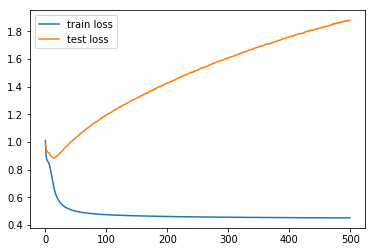

In [14]:
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()